In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
airline=pd.read_excel("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Forecasting\\Airlines+Data.xlsx")

In [3]:
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
airline.shape

(96, 2)

In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [8]:
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

<AxesSubplot:>

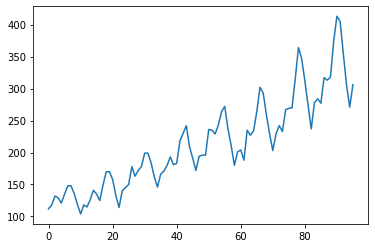

In [9]:
airline['Passengers'].plot()

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

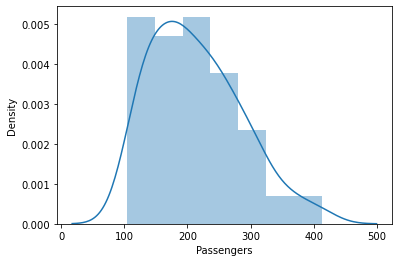

In [10]:
sns.distplot(airline['Passengers'])

<AxesSubplot:xlabel='Passengers'>

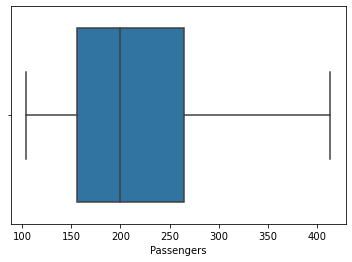

In [11]:
sns.boxplot(airline['Passengers'])

In [12]:
airline['month'] = airline['Month'].dt.strftime('%b')

airline.head()

,Month,Passengers,month
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


In [13]:
dummies=pd.DataFrame(pd.get_dummies(airline['month']))

In [14]:
airlines=pd.concat([airline,dummies],axis=1)

In [15]:
airlines

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
airlines['year']=airlines['Month'].dt.strftime('%y')

In [17]:
airlines

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,year
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,95
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,95
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,95
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,95
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,02
92,2002-09-01,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,02
93,2002-10-01,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,02
94,2002-11-01,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,02


In [18]:
airlines['t'] = np.arange(1,97)
airlines['t_sqr'] = airlines['t']*airlines['t']
airlines['log_passengers'] = np.log(airlines['Passengers'])
airlines.head()

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,year,t,t_sqr,log_passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,95,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,95,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,95,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,95,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,95,5,25,4.795791


<AxesSubplot:xlabel='month', ylabel='Passengers'>

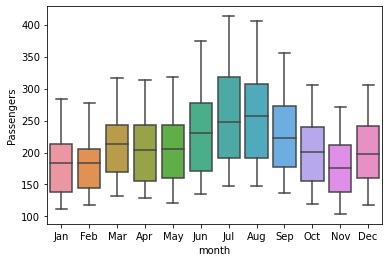

In [19]:
sns.boxplot(x="month",y="Passengers",data=airlines)


<AxesSubplot:xlabel='year', ylabel='Passengers'>

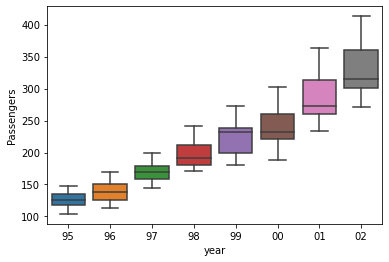

In [20]:
sns.boxplot(x="year",y="Passengers",data=airlines)

In [21]:
#tsa plots
import statsmodels.graphics.tsaplots as tsa_plots

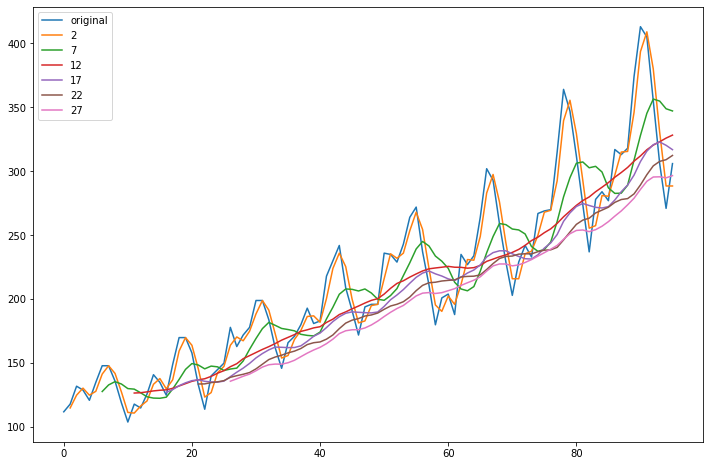

In [22]:
plt.figure(figsize=(12,8))
airlines['Passengers'].plot(label='original')
for i in range(2,30,5):
    airlines['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 
plt.show()

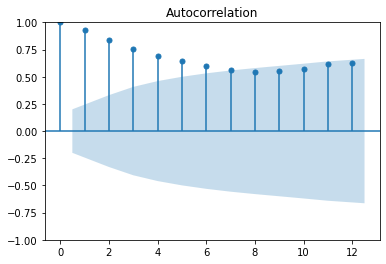

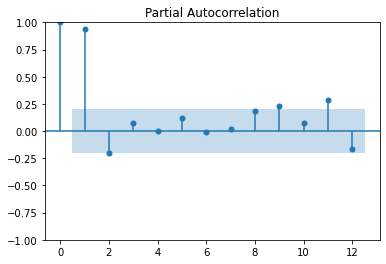

In [23]:
tsa_plots.plot_acf(airlines['Passengers'],lags=12)
tsa_plots.plot_pacf(airlines['Passengers'],lags=12)
plt.show()

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

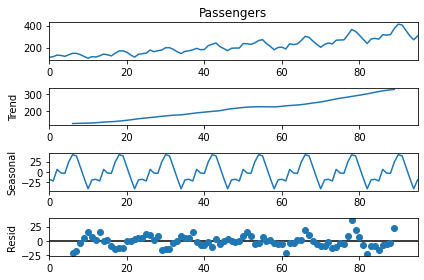

In [25]:
ts_decompose = seasonal_decompose(airlines['Passengers'],period = 12)
ts_decompose.plot()
plt.show()

In [26]:
train = airlines.head(75)
test = airlines.tail(25)

In [27]:
train

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,year,t,t_sqr,log_passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,95,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,95,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,95,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,95,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,95,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2000-11-01,203,Nov,0,0,0,0,0,0,0,0,0,1,0,0,00,71,5041,5.313206
71,2000-12-01,229,Dec,0,0,1,0,0,0,0,0,0,0,0,0,00,72,5184,5.433722
72,2001-01-01,242,Jan,0,0,0,0,1,0,0,0,0,0,0,0,01,73,5329,5.488938
73,2001-02-01,233,Feb,0,0,0,1,0,0,0,0,0,0,0,0,01,74,5476,5.451038


In [28]:
test

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,year,t,t_sqr,log_passengers
71,2000-12-01,229,Dec,0,0,1,0,0,0,0,0,0,0,0,0,00,72,5184,5.433722
72,2001-01-01,242,Jan,0,0,0,0,1,0,0,0,0,0,0,0,01,73,5329,5.488938
73,2001-02-01,233,Feb,0,0,0,1,0,0,0,0,0,0,0,0,01,74,5476,5.451038
74,2001-03-01,267,Mar,0,0,0,0,0,0,0,1,0,0,0,0,01,75,5625,5.587249
75,2001-04-01,269,Apr,1,0,0,0,0,0,0,0,0,0,0,0,01,76,5776,5.594711
76,2001-05-01,270,May,0,0,0,0,0,0,0,0,1,0,0,0,01,77,5929,5.598422
77,2001-06-01,315,Jun,0,0,0,0,0,0,1,0,0,0,0,0,01,78,6084,5.752573
78,2001-07-01,364,Jul,0,0,0,0,0,1,0,0,0,0,0,0,01,79,6241,5.897154
79,2001-08-01,347,Aug,0,1,0,0,0,0,0,0,0,0,0,0,01,80,6400,5.849325
80,2001-09-01,312,Sep,0,0,0,0,0,0,0,0,0,0,0,1,01,81,6561,5.743003


In [29]:
import statsmodels.formula.api as smf

In [30]:
#linear model

lnr_model = smf.ols('Passengers~t',data = train).fit()
pred_lnr = pd.Series(lnr_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_lnr))**2))
print('RMSE Linear:',rmse_linear)

RMSE Linear: 51.83809749584507


In [31]:
#exponential method

exp_model = smf.ols('log_passengers~t',data = train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exponential = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
print('RMSE exponential:',rmse_exponential)

RMSE exponential: 42.775259750198


In [32]:
#addittive seasonality
add_sea_model = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea =  pd.Series(add_sea_model.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_additive_seasonality = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_additive_seasonality)

RMSE Additive seasonality:  123.0276378808424


In [33]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,Holt,ExponentialSmoothing

In [34]:
#Simple exponential smoothing model
ses_model = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start=test.index[0],end=test.index[-1])
ses_rmse = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_ses))**2))
ses_rmse

77.71310757781292

In [35]:
#Holt model
holt_model = Holt(train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_holt = holt_model.predict(start=test.index[0],end=test.index[-1])
holt_rmse = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_holt))**2))
holt_rmse

42.88281154093853

In [36]:
#evaluation Metric MAPE
#Mean Absolute Percentage Error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [37]:
#Weighted Moving Average
import pandas as pd
import numpy as np 
df = pd.DataFrame({'X':range(100,30, -5)})
weights = np.array([0.1, 0.2, 0.3, 0.4])
df['MA'] = df['X'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,X,MA
0,100,NaN
1,95,NaN
2,90,NaN
3,85,90.0
4,80,85.0
5,75,80.0
6,70,75.0
7,65,70.0
8,60,65.0
9,55,60.0


In [38]:
df=pd.DataFrame()
df['Passengers']=airlines["Passengers"]
df['WMA'] = df['Passengers'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,Passengers,WMA
0,112,NaN
1,118,NaN
2,132,NaN
3,129,126.0
4,121,125.3
...,...,...
91,405,392.5
92,355,383.5
93,306,351.2
94,271,311.7
